<a href="https://colab.research.google.com/github/nureeee/Visualization/blob/main/210603_MDataAnalysis_Titanic_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 가설 세우기
 미혼 여성보다 기혼 여성의 생존률이 높을 것이다

# 2. 데이터 전처리 
** 이름 컬럼에서 파이썬으로 특정 문자열(Miss, Mrs.) 분리 색인 
 

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
 
# csv 파일 불러오기
import pandas as pd 

Miss = pd.read_csv("/content/train.csv") 


Miss.head()
#df= pd.DataFrame({'Name': ['Miss','Mrs'],



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Miss = Miss[["Name","Survived", "Age", "SibSp","Pclass"]]

In [ ]:
Miss['결혼여부'] = Miss['Name'].apply(lambda x : 1 if 'Miss' in x  else (0 if 'Mrs' in x else 3))

In [ ]:
Female= Miss[["Name","Survived", "Age", "SibSp","Pclass","결혼여부"]]

In [ ]:
Female

,Name,Survived,Age,SibSp,Pclass,결혼여부
0,"Braund, Mr. Owen Harris",0,22.0,1,3,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,1,0
2,"Heikkinen, Miss. Laina",1,26.0,0,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,1,0
4,"Allen, Mr. William Henry",0,35.0,0,3,3
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0,27.0,0,2,3
887,"Graham, Miss. Margaret Edith",1,19.0,0,1,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,3,1
889,"Behr, Mr. Karl Howell",1,26.0,0,1,3


In [ ]:
drop_idx3 = Female.loc[Female['결혼여부'] == 3].index
drop_idx3

Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
            ...
            873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
           dtype='int64', length=582)

In [ ]:
Female = Female.drop(drop_idx3, axis= 0)
Female.loc[Female['결혼여부'] == 3]                 

,Name,Survived,Age,SibSp,Pclass,결혼여부


In [ ]:
stacked_bar_df = Female.groupby(["결혼여부","Survived"]).size().unstack()
stacked_bar_df

Survived,0,1
결혼여부,,
0,26,101
1,55,127


In [ ]:
import matplotlib.pyplot as plt


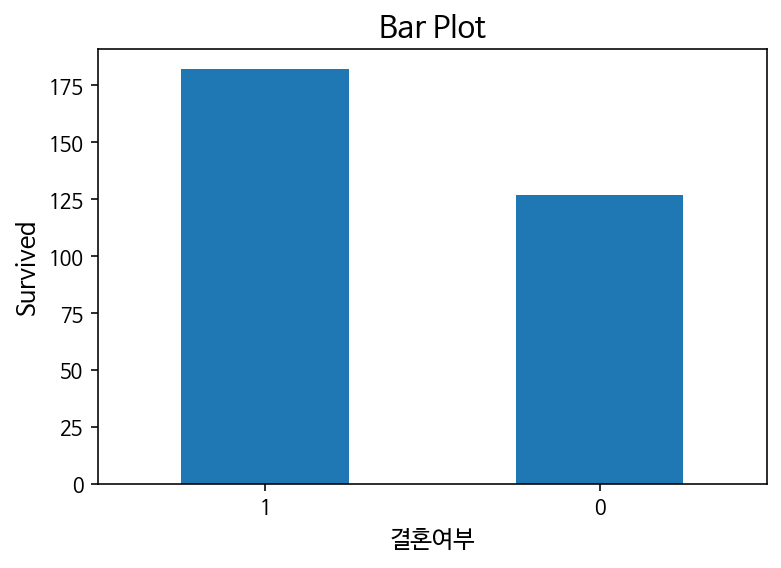

In [ ]:
Female["결혼여부"].value_counts().plot(kind='bar')
plt.title("Bar Plot", fontsize=15)
plt.ylabel("Survived", fontsize=12)
plt.xlabel("결혼여부", fontsize=12)

plt.xticks(rotation=0)
plt.show()

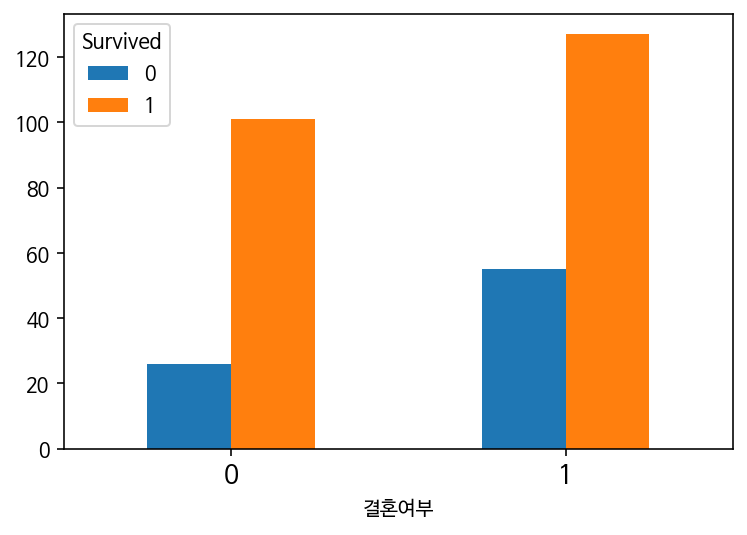

In [ ]:
stacked_bar_df.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)
plt.show()

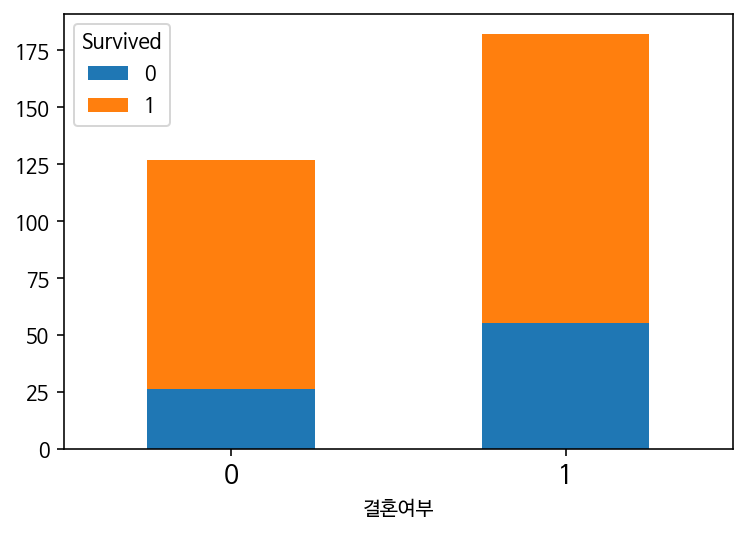

In [ ]:
stacked_bar_df.plot(kind='bar', stacked=True)
plt.xticks(rotation=0, fontsize=13)
plt.show()

In [ ]:
stacked_bar_df1 = Female.groupby(["결혼여부","SibSp"]).size().unstack()
stacked_bar_df1

SibSp,0,1,2,3,4,5,8
결혼여부,,,,,,,
0,46.0,76.0,3.0,2.0,NaN,NaN,NaN
1,123.0,30.0,10.0,9.0,6.0,1.0,3.0


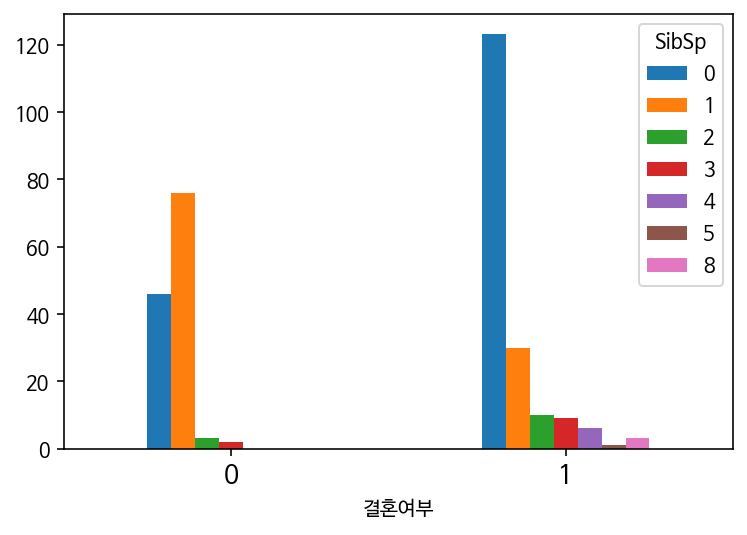

In [ ]:
stacked_bar_df1.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)
plt.show()

In [ ]:
df_pivot_S = pd.pivot_table(
    Female,
    index='결혼여부',
    columns='SibSp',
    values='Survived'
)

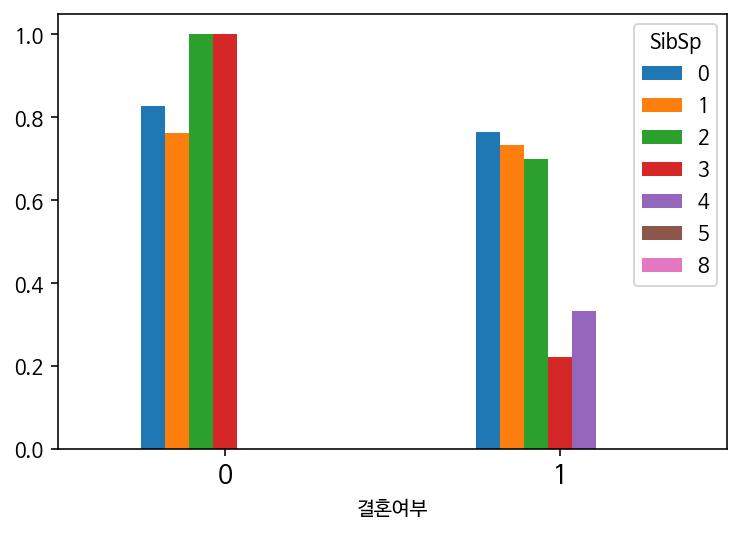

In [ ]:
df_pivot_S.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)
plt.show()

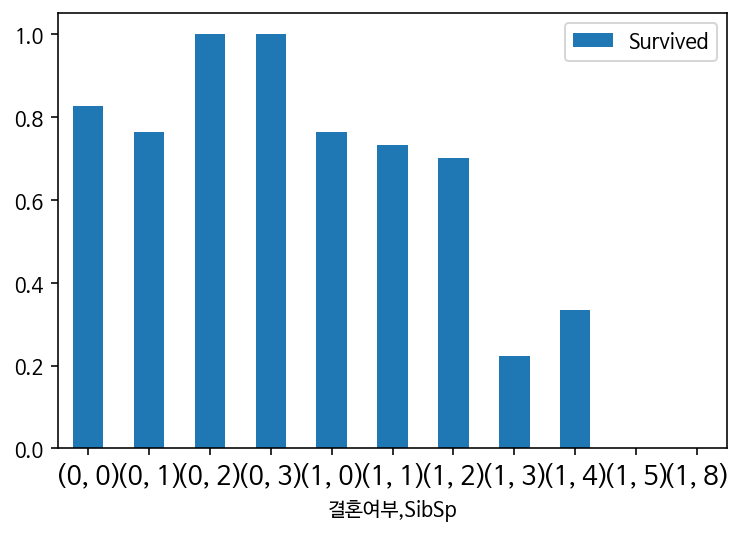

In [ ]:
df_pivot.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)
plt.show()